In [7]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2613,ham,Thanks for sending this mental ability question..,NaN,NaN,NaN
4586,ham,"I'll see if I can swing by in a bit, got some ...",NaN,NaN,NaN
16,ham,Oh k...i'm watching here:),NaN,NaN,NaN
1007,ham,I don't quite know what to do. I still can't g...,NaN,NaN,NaN
3911,spam,You have an important customer service announc...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [11]:
#1. data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvements
#7. website 
#8. Deploy

In [ ]:
## DATA CLEANING

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#we will drop last three columns as very low values

In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(5)

,v1,v2
1612,spam,RT-KIng Pro Video Club>> Need help? info@ringt...
3931,ham,Sos! Any amount i can get pls.
1989,ham,The basket's gettin full so I might be by tonight
1097,ham,Don't fret. I'll buy the ovulation test strips...
2029,ham,Thanx but my birthday is over already.


In [21]:
#rename the column

In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
607,ham,what I meant to say is cant wait to see u agai...
1597,spam,URGENT! Your Mobile number has been awarded wi...
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...
1620,ham,"Fuck babe, I miss you sooooo much !! I wish yo..."
1178,ham,"I'm outside islands, head towards hard rock an..."


In [19]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [21]:
df['target']=encode.fit_transform(df['target'])

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [33]:
#check for duplicates

In [27]:
df.duplicated().sum()

403

In [29]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [33]:
df.shape

(5169, 2)

# **EDA**

In [35]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

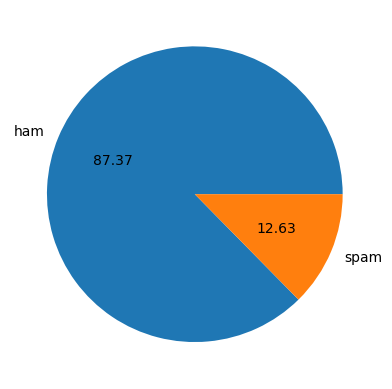

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [45]:
#data is imbalanced

In [47]:
!pip install nltk

In [49]:
import nltk

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
df['num_characters']=df['text'].apply(len)

In [57]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
#num of words

In [65]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [69]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [73]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()
#ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
#spam

In [81]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [83]:
import seaborn as sns

C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

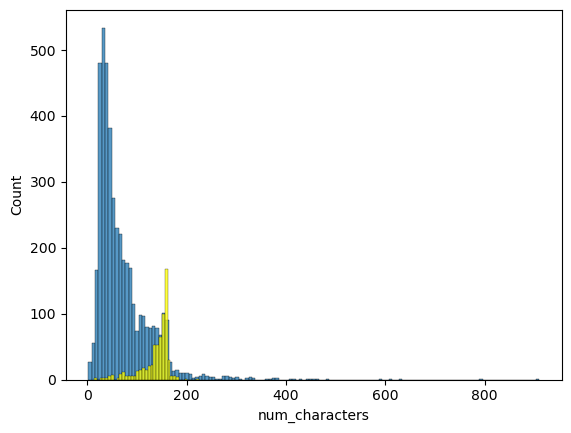

In [87]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')
#1 is ham

C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

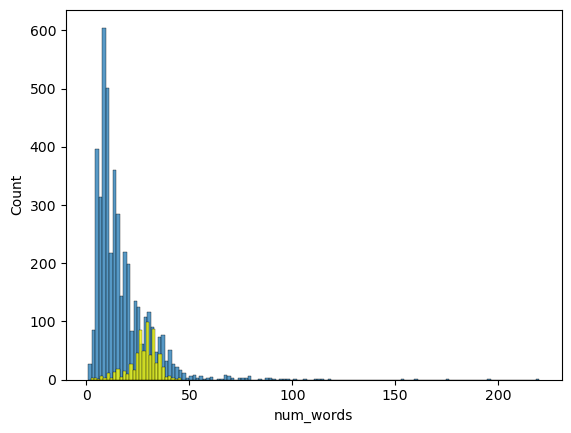

In [89]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


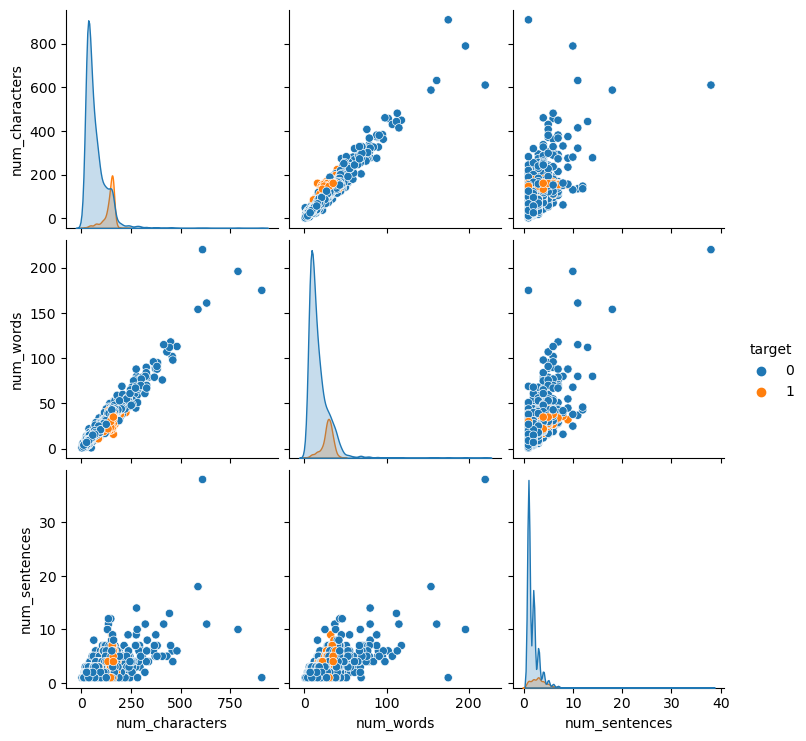

In [91]:
sns.pairplot(df,hue='target')

<Axes: >

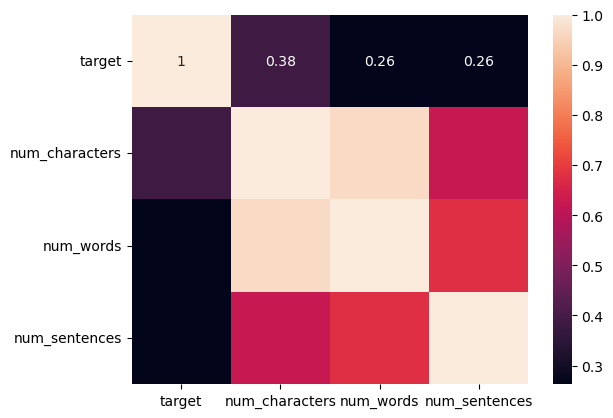

In [99]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

# **Data/text Preprocessing**

Lower case,Tokenisation,Removing special characters,Removing stop words and punctuation,stemming

In [169]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)


    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text=y[:]
    y.clear()

    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [175]:
transform_text('I loved the YT lectures on machine learning. How about you?')

'love yt lectur machin learn'

In [1]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('won')

'won'

In [179]:
df['transformed_text']=df['text'].apply(transform_text)

In [180]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [193]:
#word cloud
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 837.8 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 782.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 857.5 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 901.1 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 896.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 883.9 kB/s eta 0:00:00


In [207]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [209]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

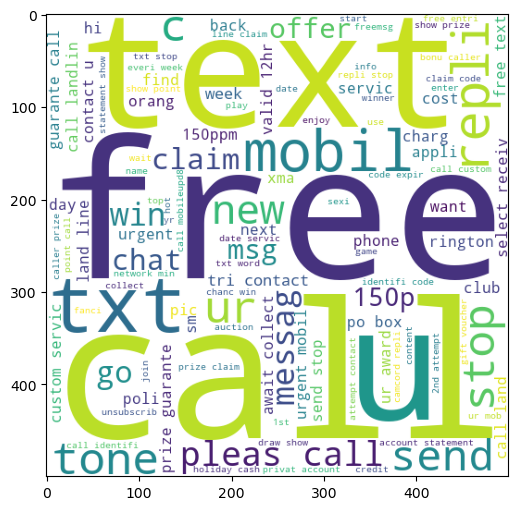

In [213]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [215]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

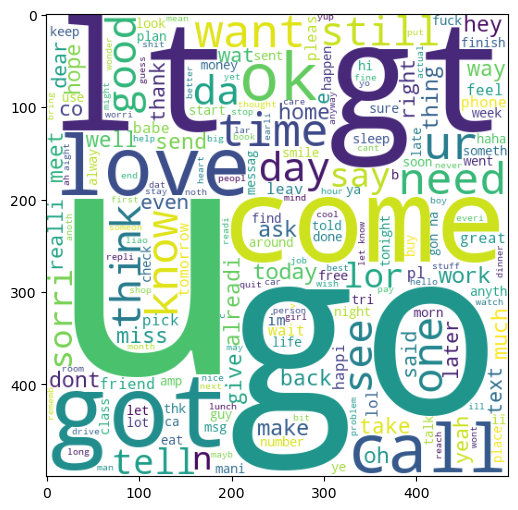

In [217]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [219]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [229]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [231]:
len(spam_corpus)

9939

In [233]:
from collections import Counter

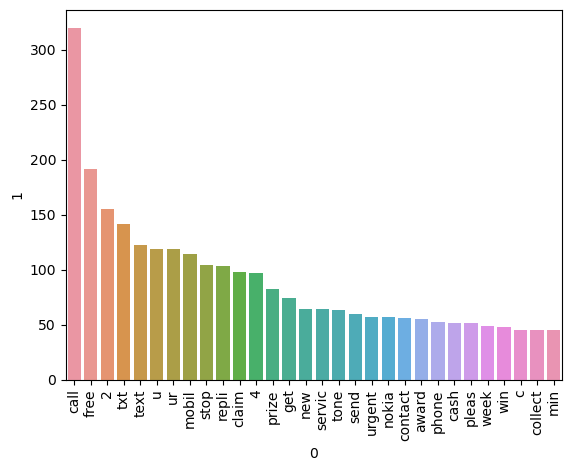

In [269]:
sns.barplot(x='0', y='1', data=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['0', '1']))
plt.xticks(rotation='vertical')
plt.show()

In [271]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [273]:
len(ham_corpus)

35404

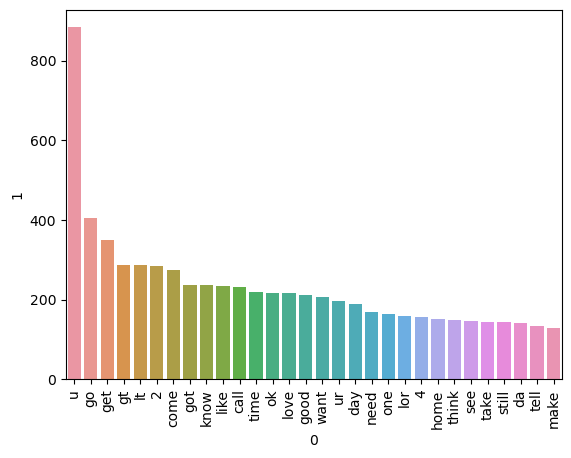

In [275]:
sns.barplot(x='0', y='1', data=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['0', '1']))
plt.xticks(rotation='vertical')
plt.show()

# **MODEL BUILDING**

we need to make words into vectors for training

In [480]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [482]:
X= cv.fit_transform(df['transformed_text']).toarray()

In [484]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [485]:
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))
#didnt work well so skipped that

In [486]:
X.shape

(5169, 6708)

In [490]:
y=df['target'].values

In [492]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [494]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [496]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [498]:
# using logistic regression instead of naive bayes

In [500]:
from sklearn.linear_model import LogisticRegression

In [502]:
lrc=LogisticRegression()

In [508]:
lrc.fit(X_train,y_train)
y_pred=lrc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [509]:
accuracy,precision

(0.9738878143133463, 1.0)

we see that the count vectoriser is working better than the tfidf so using that
(0.9787234042553191, 0.9915254237288136)
now after scaling we got 1 precision which is very good. so working with that.
(0.9738878143133463, 1.0)

In [333]:
# model improvement

In [513]:
#model improvement done

In [515]:
import pickle 

In [517]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [521]:
pickle.dump(lrc,open('model.pkl','wb'))